# **Mini-projet n°2 : Un exemple de système chaotique (Combes Robin)**

___

## <ins>Objectif :</ins>
#### On souhaite comprendre et caractériser un exemple connu de système chaotique (déterministe) : l'équation logistique, qui fut initialement introduite vers le milieu du XIX$^{e}$ siècle par le mathématicien belge Paul-François Verhulst afin d'étudier un modéle d'évolution de population.

## <ins>Présentation du problème :</ins>

###### [ Texte issu du document explicatif du mini-projet et légèrement modifié ]

#### On suppose que cette dynamique décrit correctement une population de lapins.<br><br>On note $n_i$ la population de lapins l'année $i$, et $\alpha$ le nombre de petits par portée (une par an).<br>On a alors : $n_{i+1} = \alpha n_i$, et si $\alpha$ est une constante on obtiendra l'année $p$ :$\,\,n_p = \alpha^p n_0 $ lapins, c'est-à-dire une croissance exponentielle de la population de lapins.

#### <div style='text-align:justify;'>Mais la quantité finie de ressources ainsi que les prédateurs va limiter cette croissance séculaire. Cela se traduit mathématiquement par le fait que $\alpha$ ne puisse plus être une constante mais une fonction de $n_i$ ainsi que d'autres paramètres. Si l'on note $r$ le taux de croissance maximal et $n_{\max}$ le nombre maximal de lapins qu'il peut exister (en consommant donc toutes les ressources), alors le coefficient $\alpha$ pourrait s'écrire :<br><br>$$ \alpha = r \left( 1 - \frac{n_i}{n_{\max}} \right) $$<br><br>La forme de l'équation d'évolution de la population devient alors :<br><br>$$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $$<br><br>et peut se réécrire avec la nouvelle variable $x_i = n_i / n_{\max}$ de la façon suivante :<br><br>$$ x_{i+1} = r (1-x_i)x_i $$<br><br>que l'on appelle « équation logistique ».</div>

## <ins>Définition et comportement de la suite logistique :</ins>

#### Pour étudier l'équation établie dans la section précédente, on introduit dans un premier temps la fonction logistique $f$ définie sur $[0,1]$ par $f : x\longmapsto rx(1-x)$, $\,$avec $r$ un paramètre réel.

#### On définit ensuite par récurrence la suite logistique $(x_{n})_{n\in \mathbb{N}}$ par : $\begin{equation}\left\{\begin{aligned}x_{0}\in [0,1]\\x_{n+1}\,=\,f(x_{n})\\\end{aligned}\right.\end{equation}\,\,\,$, avec $f$ la fonction logistique définie çi dessus.

#### Çi-dessous se trouve le script python permettant de représenter de façon graphique le comportement de la suite pour $r=2.5$ et $x_0=0.1$ :

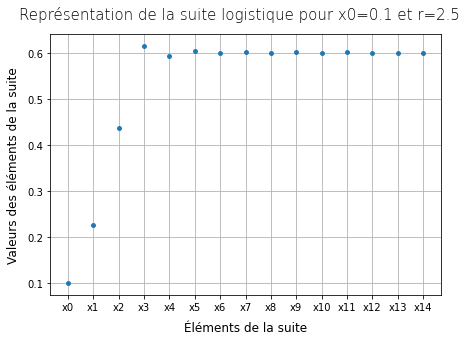

In [1]:
#On importe les modules nécessaires
import numpy as np
from matplotlib import pyplot as plt
#On définit la fonction logistique f
def f(x,r):
    return r*(1-x)*x
#On définit la fonction qui à une valeur de x0, une valeur du paramètre r et une valeur du nombre n de points voulu affiche la représentation de la suite
def aff1(x0,r,nombre_de_points):
    x=np.array(['x{}'.format(i) for i in range(0,nombre_de_points)])  #On définit le vecteur des éléments de l'axe des abscisses de sorte qu'il en contienne autant que le nombre de points voulu
    y=np.array([x0])                                                  #On initialise le vecteur des des éléments de l'axe des ordonnées
    for i in range(1, len(x)):                                        #On itère sur la longueur de x (i.e. le nombre de points)
        y = np.append(y, f(y[-1],r))                                  #On ajoute à y l'élément suivant de la suite 
    plt.figure(figsize=(7,4.8))                                       #On définit la taille de la figure de sorte à avoir une disposition harmonieuse des éléments
    plt.suptitle("Représentation de la suite logistique pour x0={} et r={}".format(x0,r),fontsize=15, fontweight='light', horizontalalignment='center',y=0.96) #On définit le "sur-titre" du graphe et ses paramètres
    plt.xlabel('Éléments de la suite',fontsize=12,labelpad=9)         #On définit la légende de l'axe des abscisses et ses paramètres
    plt.ylabel('Valeurs des éléments de la suite',fontsize=12,labelpad=7) #Idem pour l'axe des ordonnées
    plt.scatter(x,y,s=15)                                             #On crée notre tracé
    plt.grid()                                                        #On ajoute une grille au graphe
    plt.gca().set_axisbelow(True)                                     #On paramètre la grille de sorte à ce qu'elle passe en arrière plan du tracé
    plt.show()                                                        #On affiche le tout
    
aff1(0.1,2.5,15)

#### On constate alors que la suite semble tendre vers une limite finie $l=0.6$.

#### En conservant la valeur de $x_{0}=0.1$ et en faisant varier la valeur de $r$ entre $2.5$ et $4$, on remarque des changements de comportement significatifs de la suite logistique.<br>Par exemple, le script python çi-dessous permet d'afficher les représentations graphiques de la suite pour $r=2.8\,$,$\,r=3.2\,$,$\,r=3.5\,$ et $\,r=3.8$.

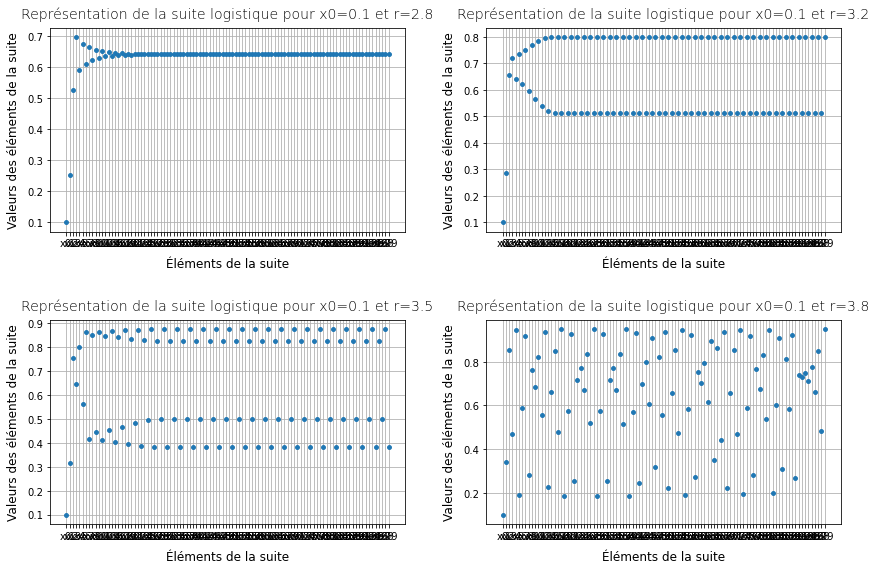

In [2]:
#Idem que précédemment
import numpy as np
from matplotlib import pyplot as plt
def f(x,r):
    return r*(1-x)*x

def aff1(x0,r,nombre_de_points):
    x=np.array(['x{}'.format(i) for i in range(0,nombre_de_points)])
    y=np.array([x0])
    for i in range(1, len(x)):
        y = np.append(y, f(y[-1],r))
    return [x,y]  #On retourne cette fois çi une liste contenant en première position le vecteur contenant les éléments de l'axe des abscisses et en deuxième position le vecteur contenant les éléments de l'axe des ordonnées      

#On affecte les retours de aff1 à des variables pour ne pas alourdir le code par la suite
A1=aff1(0.1,2.8,100)
A2=aff1(0.1,3.2,100)
A3=aff1(0.1,3.5,100)
A4=aff1(0.1,3.8,100)
#On définit une fenêtre multi-graphique
f,ax=plt.subplots(2,2)
#On s'occupe de la première zone de tracé
ax[0,0].set_title("Représentation de la suite logistique pour x0=0.1 et r=2.8",fontsize=14, fontweight='light', horizontalalignment='center',y=1.02)
ax[0,0].set_xlabel('Éléments de la suite',fontsize=12,labelpad=9)
ax[0,0].set_ylabel('Valeurs des éléments de la suite',fontsize=12,labelpad=7)
ax[0,0].scatter(A1[0],A1[1],s=15)
ax[0,0].grid()
ax[0,0].set_axisbelow(True)
#On s'occupe de la deuxième zone de tracé
ax[0,1].set_title("Représentation de la suite logistique pour x0=0.1 et r=3.2",fontsize=14, fontweight='light', horizontalalignment='center',y=1.02)
ax[0,1].set_xlabel('Éléments de la suite',fontsize=12,labelpad=9)
ax[0,1].set_ylabel('Valeurs des éléments de la suite',fontsize=12,labelpad=7)
ax[0,1].scatter(A2[0],A2[1],s=15)
ax[0,1].grid()
ax[0,1].set_axisbelow(True)
#On s'occupe de la troisième zone de tracé
ax[1,0].set_title("Représentation de la suite logistique pour x0=0.1 et r=3.5",fontsize=14, fontweight='light', horizontalalignment='center',y=1.02)
ax[1,0].set_xlabel('Éléments de la suite',fontsize=12,labelpad=9)
ax[1,0].set_ylabel('Valeurs des éléments de la suite',fontsize=12,labelpad=7)
ax[1,0].scatter(A3[0],A3[1],s=15)
ax[1,0].grid()
ax[1,0].set_axisbelow(True)
#On s'occupe de la quatrième zone de tracé
ax[1,1].set_title("Représentation de la suite logistique pour x0=0.1 et r=3.8",fontsize=14, fontweight='light', horizontalalignment='center',y=1.02)
ax[1,1].set_xlabel('Éléments de la suite',fontsize=12,labelpad=9)
ax[1,1].set_ylabel('Valeurs des éléments de la suite',fontsize=12,labelpad=7)
ax[1,1].scatter(A4[0],A4[1],s=15)
ax[1,1].grid()
ax[1,1].set_axisbelow(True)
f.tight_layout(rect=[0,0,2,2],w_pad=3,h_pad=3) #On ajuste les marges et la taille générale de la figure pour une disposition plus harmonieuse
plt.show()
    

#### <div style='text-align:justify;'>On constate alors que pour $r=2.8$ la suite semble toujours converger mais vers une valeur différente comprise entre $0.6$ et $0.7\,$; pour $r=3.2$ il apparaît clairement que la suite admet deux sous-suites convergentes tandis que pour $r=3.5$ elle semble en admettre quatre ; enfin dans le cas où $r=3.8$ la suite apparaît comme divergente, présentant un comportement chaotique.</div>

## <ins>Diagramme de bifurcation :</ins>

#### <div style='text-align:justify;'>À la lumière des constats précédents, on peut alors chercher à représenter de façon systématique le comportement asymptotique de la suite logistique pour un grand nombre de valeurs de $r$ toutes comprises entre $2.5$ et $4$.<br>On se donnera pour cela une valeur fixée de $x_{0}$ à $0.00001$, et on calculera pour chaque valeur de $r$ les $1000$ premiers termes de la suite parmi lesquels on ne conservera que les 100 derniers.<br>À l'aide du script python çi-dessous on affichera alors sur un même graphe et à une abscisse $r$ donnée (pour $r\in [2.5,4]$), les 100 valeurs évoquées précédemment de façon à former ce que l'on appelle le diagramme de bifurcation associé à la suite logistique.</div>

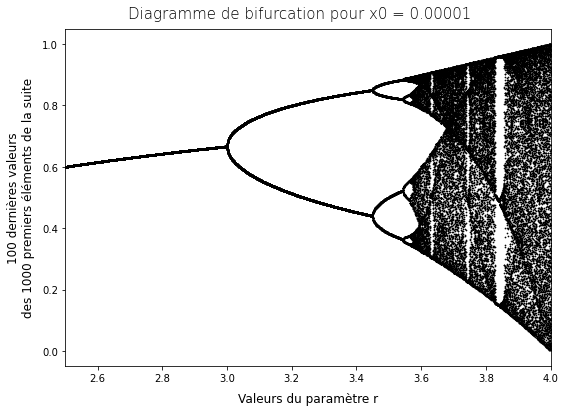

In [3]:
#Idem que précédemment
import numpy as np
from matplotlib import pyplot as plt
U=np.linspace(2.5,4,1000)
def f(x,r):
    return r*(1-x)*x
#On va créer le diagramme en affichant les 100 valeurs pour un r donné "tranche par tranche" i.e. un r après l'autre
def aff2(x0):
    y = np.array([x0])            #On initialise le vecteur des des éléments de l'axe des ordonnées
    k = x0                        #On initialise la variable k à la valeur x0
    for j in U:                   #On boucle sur les valeurs de r
        for i in range(1, 1000):  #On boucle sur le nombre de termes de la suite que l'on souhaite obtenir pour un r donné (i.e. 1000 ici)
            k = f(k, j)
            y = np.append(y, k)
        y = y[900:]               #On conserve les 100 derniers termes des 1000 premières valeurs de la suite
        plt.scatter([j] * 100, y, color='black', s=0.5) #On crée le tracé de la "tranche" associée à un r donné
        y = np.array([x0])        #On ré-initialise nos variables pour la nouvelle boucle sur les valeurs de r
        k = x0
    plt.suptitle("Diagramme de bifurcation pour x0 = 0.00001", fontsize=15, fontweight='light', horizontalalignment='center', y=0.93)
    plt.xlabel("Valeurs du paramètre r", fontsize=12, labelpad=9)
    plt.ylabel("100 dernières valeurs\ndes 1000 premiers éléments de la suite", fontsize=12, labelpad=7)
    plt.xlim(2.5, 4)
    plt.gcf().set_size_inches(8.7, 6.2) #On redéfinit une taille harmonieuse pour la figure
    plt.show()

aff2(0.00001)

#### Le diagramme de bifurcation obtenu par l'exécution du programme précédent met alors en évidence de façon claire le comportement asymptotique de la suite logistique en fonction de la valeur du paramètre $r\in [2.5,4]$.<br>En effet, on constate que le diagramme présente une structure cyclique pour des valeurs de $r$ allant de $2.50$ à environ $3.57$ :<br><br>¤ un cycle d'ordre 1 pour des valeurs de $r$ comprises entre $2.50$ et environ $2.99$, pour lesquelles la suite logistique est convergente ;<br><br>¤ un cycle d'ordre 2 pour des valeurs de $r$ comprises entre environ $2.99$ et $3.44$, pour lesquelles la suite logistique admet deux sous-suites convergentes ;<br><br>¤ un cycle d'ordre 4 pour des valeurs de $r$ comprises entre environ $3.44$ et $3.54$, pour lesquelles la suite logistique admet quatre sous-suites convergentes ;<br><br>¤ ... et ainsi de suite en multipliant à chaque nouveau cycle l'odre du cycle précédent (et donc le nombre de sous-suites convergentes) par $2$.<br><br>Mais lorsque la valeur de $r$ atteint environ $3.57$, la logique cyclique se brise et la répartition des termes de la suite semble manifestement complètement chaotique alternant à certains moments avec des phases cycliques d'ordres quelconques:<br><br>¤ une 1$^{re}$ phase pour des valeurs de r comprises entre environ $3.62$ et $3.63$ ;<br><br>¤ une 2$^{de}$ phase pour des valeurs de r comprises entre environ $3.73$ et $3.74$ ;<br><br>¤ et une $3^{e}$ phase pour des valeurs de r comprises entre environ $3.82$ et $3.85$ .

#### Par ailleurs, on peut facilement vérifier que l'allure du diagramme de bifurcation n'est pas impactée par une modification de la valeur de $x_{0}$.<br>Çi-dessous se trouve le script python permettant d'afficher par exemple le diagramme de bifurcation pour $x_{0}=0.25\,$,$\,\,x_{0}=0.50\,$,$\,\,x_{0}=0.75\,$ et $\,x_{0}=0.99$.

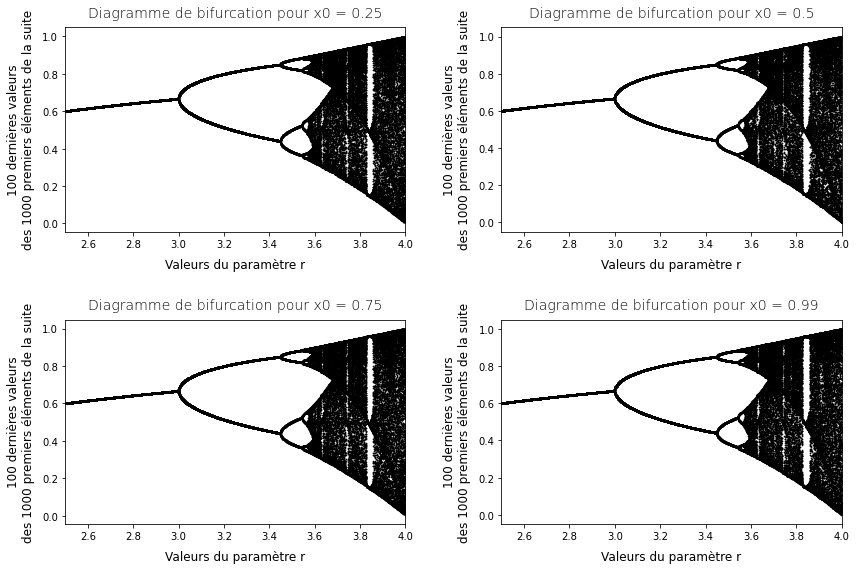

In [4]:
#Idem que précédemment mais cette fois çi on ne procède plus "tranche par tranche" mais en en faisant tout d'un seul bloc
import numpy as np
from matplotlib import pyplot as plt
U=np.linspace(2.5,4,1000)
X=[]             #On initialise la variable X qui sera destinée à contenir les éléments de l'axe des abscisses
for i in U:      #On boucle sur le nombre de valeurs de r
    X+=[i]*100   #On ajoute à chaque itération 100 fois la valeur de r (on obtiendra donc au final : len(X)=100*1000=100 000)

def f(x,r):
    return r*(1-x)*x

def aff2(x0):
    Y=np.array([])
    y = np.array([x0])
    k = x0
    for j in U:
        for i in range(1, 1000):
            k = f(k, j)
            y = np.append(y, k)
        Y=np.append(Y,y[900:])
        y = np.array([x0])
        k = x0
    return Y   #On retourne cette fois çi le vecteur contenant tous les éléments de l'axe des ordonnées pour toutes les valeurs de r
#On crée notre fenêtre multi-graphique
g,ax=plt.subplots(2,2)
#On s'occupe de la première zone de tracé
ax[0,0].set_title("Diagramme de bifurcation pour x0 = 0.25",fontsize=14, fontweight='light', horizontalalignment='center',y=1.02)
ax[0,0].set_xlabel('Valeurs du paramètre r',fontsize=12,labelpad=9)
ax[0,0].set_ylabel("100 dernières valeurs\ndes 1000 premiers éléments de la suite",fontsize=12,labelpad=7)
ax[0,0].scatter(X, aff2(0.25), color='black', s=0.5)
ax[0,0].set_xlim(2.5,4)
#On s'occupe de la deuxième zone de tracé
ax[0,1].set_title("Diagramme de bifurcation pour x0 = 0.5",fontsize=14, fontweight='light', horizontalalignment='center',y=1.02)
ax[0,1].set_xlabel('Valeurs du paramètre r',fontsize=12,labelpad=9)
ax[0,1].set_ylabel("100 dernières valeurs\ndes 1000 premiers éléments de la suite",fontsize=12,labelpad=7)
ax[0,1].scatter(X, aff2(0.5), color='black', s=0.5)
ax[0,1].set_xlim(2.5,4)
#On s'occupe de la troisième zone de tracé
ax[1,0].set_title("Diagramme de bifurcation pour x0 = 0.75",fontsize=14, fontweight='light', horizontalalignment='center',y=1.02)
ax[1,0].set_xlabel('Valeurs du paramètre r',fontsize=12,labelpad=9)
ax[1,0].set_ylabel("100 dernières valeurs\ndes 1000 premiers éléments de la suite",fontsize=12,labelpad=7)
ax[1,0].scatter(X, aff2(0.75), color='black', s=0.5)
ax[1,0].set_xlim(2.5,4)
#On s'occupe de la quatrième zone de tracé
ax[1,1].set_title("Diagramme de bifurcation pour x0 = 0.99",fontsize=14, fontweight='light', horizontalalignment='center',y=1.02)
ax[1,1].set_xlabel('Valeurs du paramètre r',fontsize=12,labelpad=9)
ax[1,1].set_ylabel("100 dernières valeurs\ndes 1000 premiers éléments de la suite",fontsize=12,labelpad=7)
ax[1,1].scatter(X, aff2(0.99), color='black', s=0.5)
ax[1,1].set_xlim(2.5,4)
g.tight_layout(rect=[0,0,2,2],w_pad=3,h_pad=3)
plt.show()

## <ins>Exposant de Lyapunov et conclusion :</ins>

###### [ Texte issu du document explicatif du mini-projet et légèrement modifié ]

#### <div style='text-align:justify;'>Le caractère chaotique d'un système dynamique tient à la manière dont une différence, aussi petite soit-elle, sur deux conditions initiales va pouvoir conduire à une divergence sévère de leur comportement asymptotique. Mathématiquement, cela signifie que la distance entre ces deux solutions va augmenter de manière exponentielle, suivant une forme en :$\,\,e^{t \lambda(r)}$, qui va donc dépendre de la valeur de $r$.<br>La manière de déterminer l'exposant $\lambda$ est alors due au mathématicien russe Aleksander Lyapunov (1857-1918), qui lui a trouvé l'expression suivante :<br><br>$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$<br>Dès lors, la valeur de cet exposant va constituer en soi une mesure du degré de sensibilité du système dynamique considéré vis à vis d'une variation infinitésimale de sa condition initiale (ici : la valeur de $r$). Une valeur de $\lambda$ négative sera ainsi, dans notre cas, synonyme de stabilité du comportement asymptotique de la suite logistique, tandis qu'une valeur positive de $\lambda$ sera synonyme d'instabilité.</div>

#### Çi dessous se trouve le script python permettant de représenter graphiquement l'évolution de la valeur de $\lambda$ en fonction de $r$ dans notre cas :

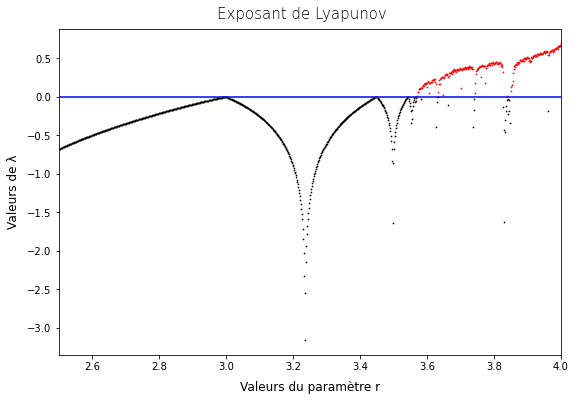

In [5]:
#Idem que précédemment
import numpy as np
from matplotlib import pyplot as plt
x0=0.0001
U=np.linspace(2.5,4,1000)
V=np.array([])
def f(x,r):
    return r*(1-x)*x
#On définit cette fois la fonction dérivée de la foncion logistique
def g(x,r):
    return r-2*r*x

y=np.array([x0])
k=x0
l=0
for j in U:                   #On boucle sur les différentes valeurs de r
    for i in range(1, 1000):  #On boucle pour récupérer un vecteur contenant les 1000 premières valeurs de la suite pour x=0.00001 et r donné
        k = f(k, j)
        y = np.append(y, k)
    y=np.log(abs(g(y,j)))     #On applique au vecteur les opérations dictées par l'expression de Lyapunov
    l=(y.sum())/1001
    V=np.append(V,l)          #On ajoute à V l'image de r par λ
    l=0                       #On ré-initialise nos variables pour la boucle suivante
    y = np.array([x0])
    k=x0
#On sépare les valeurs de λ de manière à pouvoir afficher en rouge celles qui sont supérieures à 0 et en noir les autres
V1=np.array([])
U1=np.array([])
V2=np.array([])
U2=np.array([])
for i in range(len(V)):
    if V[i]<=0:
        U1=np.append(U1,U[i])
        V1=np.append(V1,V[i])
    else :
        U2 = np.append(U2, U[i])
        V2 = np.append(V2, V[i])

plt.figure(figsize=(9,6))
plt.scatter(U1,V1,color='black',s=0.5)
plt.scatter(U2,V2,color='red',s=0.5)
plt.hlines(0,2.5,4,color='blue') #On crée le tracé de la ligne bleu horizontale
plt.xlim(2.5,4)
plt.xlabel("Valeurs du paramètre r", fontsize=12, labelpad=9)
plt.ylabel("Valeurs de λ", fontsize=12, labelpad=7)
plt.suptitle("Exposant de Lyapunov", fontsize=15, fontweight='light', horizontalalignment='center', y=0.93)
plt.show()

#### <div style='text-align:justify;'>On constate ainsi que les informations fournies par le graphe çi-dessus coïncident parfaitement avec celles que l'on a pu tirer du diagramme de bifurcation. <br>En effet, pour des valeurs de $r$ comprises entre $2.50$ et environ $3.57$, la suite logistique suit une évolution cyclique d'ordre $2^{n}$ durant laquelle sont comportement asymptotique est stable avec une limite instable pour les valeurs de $r$ correspondant à un changement de cycle et donc a un changement du comportement asymptotique de la suite : ce sont, sur le graphe çi-dessus, les endroits où la courbe noire se rapproche de $0$ pour $r\in [2.50,3.57]$.<br>Comme on s'y attendait, à partir de $r\simeq 3.57$, le comportement asymptotique de la suite logistique est globalement instable avec certains points de stabilité : on peut discerner trois principales zones qui correspondent à celles évoquées précédemment dans la section réservée au digramme de bifurcation.<div/>